# Gradient Boost model for Healthcare Fraud Detection

Deborah Leong, Sam Nuzbrokh and Doug Devens

This notedbook describes development of a gradient boost classification model to detect potentially fraudulent healthcare providers.

Import pandas package and scikitlearn metrics reports.  Read in file created by provider_inout_mods.  Also read in the mean residual by provider created by notebook 'Provider_claim_data_regression' and is described elsewhere.

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train_inout_mod = pd.read_csv('x_train_inout_mod.csv')
provider_reimb_residuals=pd.read_csv('provider_groups_residual.csv')
provider_reimb_residuals = provider_reimb_residuals.drop(columns=['Unnamed: 0'])
provider_reimb_residuals.columns


Index(['Provider', 'MeanResidualReimbursement', 'logOPAnnualReimbursement',
       'logIPAnnualReimbursement', '$PerClaimDay', 'InscClaimAmtReimbursed'],
      dtype='object')

Rename columns in provider_reimb_residuals and drop extra column brought in with file read-in. Merge the two files on provider to combine the data.

In [3]:
provider_reimb_residuals.columns=['Provider','MeanResidualReimbursement','logOPAnnualReimbursement',\
                'logIPAnnualReimbursement','$PerClaimDay','total_claim']
x_train_inout_mod = x_train_inout_mod.drop(columns = 'Unnamed: 0')
x_train_inout_mod = pd.merge(x_train_inout_mod,provider_reimb_residuals,on='Provider')


Set target column y and drop target column from feature dataframe.

In [4]:
y = x_train_inout_mod['PotentialFraud']
X = x_train_inout_mod.drop(columns = ['PotentialFraud'])


In [89]:
x_train_inout_mod.columns


Index(['Age_in', 'Age_out', 'AttendingPhysician_in', 'AttendingPhysician_out',
       'ClaimDays_in', 'ClaimDays_out', 'DeductibleAmtPaid_in',
       'DeductibleAmtPaid_out', 'Gender_in', 'Gender_out',
       'InscClaimAmtReimbursed_in', 'InscClaimAmtReimbursed_out',
       'NumChronics_in', 'NumChronics_out', 'NumDiag_in', 'NumDiag_out',
       'NumProc_in', 'NumProc_out', 'State_in', 'State_out', 'WhetherDead_in',
       'WhetherDead_out', 'ClaimDays_in_Range', 'ClaimDays_out_Range',
       'InscClaimAmtReimbursed_in_Range', 'InscClaimAmtReimbursed_out_Range',
       'NumChronics_in_Range', 'NumChronics_out_Range', 'NumDiag_in_Range',
       'NumDiag_out_Range', 'NumProc_in_Range', 'NumProc_out_Range',
       'Provider', 'PotentialFraud', 'docDegMax', 'docBtwnMean', 'docEignMean',
       'docMANN', 'patDegMax', 'patBtwnMean', 'patEignMean', 'patMANN',
       'ClmsPerPhysician_in', 'ClmsPerPhysician_out', 'ClmsPerPatient_in',
       'ClmsPerPatient_out', 'DrPerPatient_in', 'DrPerPatie

Import sklearn model selection test_train_split and split data into training and test sets.

In [90]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                            test_size=0.20, random_state=42)

Drop Provider (alphanumeric identifier of providers) and their total claim amount from X since this isn't a feature we will use in the model.

In [91]:
X = X.drop(columns=['Provider','total_claim'])

In [92]:
X_train.columns

Index(['Age_in', 'Age_out', 'AttendingPhysician_in', 'AttendingPhysician_out',
       'ClaimDays_in', 'ClaimDays_out', 'DeductibleAmtPaid_in',
       'DeductibleAmtPaid_out', 'Gender_in', 'Gender_out',
       'InscClaimAmtReimbursed_in', 'InscClaimAmtReimbursed_out',
       'NumChronics_in', 'NumChronics_out', 'NumDiag_in', 'NumDiag_out',
       'NumProc_in', 'NumProc_out', 'State_in', 'State_out', 'WhetherDead_in',
       'WhetherDead_out', 'ClaimDays_in_Range', 'ClaimDays_out_Range',
       'InscClaimAmtReimbursed_in_Range', 'InscClaimAmtReimbursed_out_Range',
       'NumChronics_in_Range', 'NumChronics_out_Range', 'NumDiag_in_Range',
       'NumDiag_out_Range', 'NumProc_in_Range', 'NumProc_out_Range',
       'Provider', 'docDegMax', 'docBtwnMean', 'docEignMean', 'docMANN',
       'patDegMax', 'patBtwnMean', 'patEignMean', 'patMANN',
       'ClmsPerPhysician_in', 'ClmsPerPhysician_out', 'ClmsPerPatient_in',
       'ClmsPerPatient_out', 'DrPerPatient_in', 'DrPerPatient_out',
       'L

Create dataframes with the total provider claims for the training and test sets, then drop those columns since they won't be in the model. Scale the remaining dataframes since the models require scaled inputs to be able to estimate feature importances.

In [93]:
provider_claim_trn=X_train[['Provider','total_claim']]
X_train=X_train.drop(columns=['Provider','total_claim'])
X_train=(X_train-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
print(X_train.shape)

provider_claim_test=X_test[['Provider','total_claim']]
X_test=X_test.drop(columns=['Provider','total_claim'])
X_test=(X_test-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
print(X_test.shape)

(4328, 94)
(1082, 94)


In [94]:
X_scaled=X_scaled.fillna(0)
c = np.sum(X_scaled.isnull())
c[c>0]

Series([], dtype: int64)

In [56]:
y = x_train_inout_mod['PotentialFraud']
X = x_train_inout_mod.drop(columns = ['Provider', 'PotentialFraud'])
X_scaled = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X_scaled=X_scaled.fillna(0)



We import the ensemble module and from that the gradient boost classifier. This is a second iteration but represent a guess without using a grid search to find optimal parameters.  We print the confusion matrix and F1 score for the test set.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_c = GradientBoostingClassifier()
gbm_c.set_params(criterion='friedman_mse', init=None, learning_rate=0.01, loss='deviance', \
        max_depth=2,  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, \
        min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, \
        n_estimators=3000, n_iter_no_change=None, presort='deprecated', random_state=42, subsample=0.3, \
        tol=0.0001,  validation_fraction=0.1, verbose=0, warm_start=False)
sample_weight = np.array([1 if x==0 else 4.5 for x in y_train])
gbm_c.fit(X_train, y_train, sample_weight=sample_weight)
from sklearn.metrics import confusion_matrix, classification_report
print('   0    1    predicted is columns')
print(confusion_matrix(y_test, gbm_c.predict(X_test)))
print(classification_report(y_test, gbm_c.predict(X_test)))

   0    1    predicted is columns
[[925  52]
 [ 31  74]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       977
           1       0.59      0.70      0.64       105

    accuracy                           0.92      1082
   macro avg       0.78      0.83      0.80      1082
weighted avg       0.93      0.92      0.93      1082



We know that sample weighting can be used to increase the relative importance of the frauds in this imbalanced classification problem since the gradient boost problem doesn't have a class_weight= 'balanced' argument.  We examine here a range of weights, after having examined a larger range previously and then narrowing to this.

In [61]:
%%time
for x in [4,4.5,5,5.5,6,7,8]:
    sample_weight = np.array([1 if y==0 else x for y in y_train])
    gbm_c.set_params(criterion='friedman_mse', init=None, learning_rate=0.01, loss='deviance', \
        max_depth=2,  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, \
        min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, \
        n_estimators=3000, n_iter_no_change=None, presort='deprecated', random_state=42, subsample=0.3, \
        tol=0.0001,  validation_fraction=0.1, verbose=0, warm_start=False)
    gbm_c.fit(X_train, y_train, sample_weight=sample_weight)
    print(x)
    print(confusion_matrix(y_test, gbm_c.predict(X_test)))
    print(classification_report(y_test, gbm_c.predict(X_test)))
    

4
[[929  48]
 [ 32  73]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       977
           1       0.60      0.70      0.65       105

    accuracy                           0.93      1082
   macro avg       0.79      0.82      0.80      1082
weighted avg       0.93      0.93      0.93      1082

4.5
[[925  52]
 [ 31  74]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       977
           1       0.59      0.70      0.64       105

    accuracy                           0.92      1082
   macro avg       0.78      0.83      0.80      1082
weighted avg       0.93      0.92      0.93      1082

5
[[923  54]
 [ 28  77]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       977
           1       0.59      0.73      0.65       105

    accuracy                           0.92      1082
   macro avg       0.78      0.84      0.81      10

We now perform a cross-validated gridsearch of parameter space to find the optimal hyperparameters.  We then pass them to the model to fit, and find that the performance decreased (in both F1 and confusion matrix) much as we saw in the random forest model development. We decide to retain the original parameters.

In [62]:
%%time
from sklearn.model_selection import GridSearchCV
sample_weight = np.array([1 if y==0 else 5 for y in y_train])
grid_para_gbm = [{
    'criterion':['friedman_mse'],
    'loss':['deviance','exponential'],
    'n_estimators':[2500, 3000,3500],
    'min_samples_leaf':[2,3, 5,7],
    'max_depth':[1,2, 3],
    'learning_rate':[0.005, 0.01, 0.015],
    'min_samples_split':[1,2,3],
    'validation_fraction':[0.1,0.2]
}]
grid_search_gbm = GridSearchCV(gbm_c, grid_para_gbm, scoring='f1_weighted', cv=5, n_jobs=3)
grid_search_gbm.fit(X_train, y_train,sample_weight=sample_weight)
bst_prms = grid_search_gbm.best_params_
gbm_c.set_params(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=bst_prms['learning_rate'], \
                     loss=bst_prms['loss'], max_depth=bst_prms['max_depth'], max_features='auto', max_leaf_nodes=None, \
                     min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=bst_prms['min_samples_leaf'], \
                     min_samples_split=bst_prms['min_samples_split'], min_weight_fraction_leaf=0.0, n_estimators=bst_prms['n_estimators'], \
                     n_iter_no_change=None, presort='deprecated', random_state=42, subsample=0.3, tol=0.0001, \
                     validation_fraction=bst_prms['validation_fraction'], verbose=0, warm_start=False)
gbm_c.fit(X_train, y_train, sample_weight=sample_weight)
print(confusion_matrix(y_test, gbm_c.predict(X_test)))
print(classification_report(y_test, gbm_c.predict(X_test)))

[[937  40]
 [ 42  63]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       977
           1       0.61      0.60      0.61       105

    accuracy                           0.92      1082
   macro avg       0.78      0.78      0.78      1082
weighted avg       0.92      0.92      0.92      1082

CPU times: user 1min 30s, sys: 1.48 s, total: 1min 32s
Wall time: 9h 7min 38s


We go back to the original set of parameters and re-examine the weighting parameter, since this seems to affect performance significantly.

In [63]:
%%time
for x in [3,3.25,3.5,3.75,4,4.5]:
    sample_weight = np.array([1 if y==0 else x for y in y_train])
    gbm_c.set_params(criterion='friedman_mse', init=None, learning_rate=0.01, loss='deviance', \
        max_depth=2,  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, \
        min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, \
        n_estimators=3000, n_iter_no_change=None, presort='deprecated', random_state=42, subsample=0.3, \
        tol=0.0001,  validation_fraction=0.1, verbose=0, warm_start=False)
    gbm_c.fit(X_train, y_train, sample_weight=sample_weight)
    print(x)
    print(confusion_matrix(y_test, gbm_c.predict(X_test)))
    print(classification_report(y_test, gbm_c.predict(X_test)))
    

3
[[931  46]
 [ 38  67]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       977
           1       0.59      0.64      0.61       105

    accuracy                           0.92      1082
   macro avg       0.78      0.80      0.79      1082
weighted avg       0.93      0.92      0.92      1082

3.25
[[929  48]
 [ 35  70]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       977
           1       0.59      0.67      0.63       105

    accuracy                           0.92      1082
   macro avg       0.78      0.81      0.79      1082
weighted avg       0.93      0.92      0.93      1082

3.5
[[929  48]
 [ 34  71]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       977
           1       0.60      0.68      0.63       105

    accuracy                           0.92      1082
   macro avg       0.78      0.81      0.80     

Having selected an optimal set of parameters for our desired performance parameters, we now introduce noise in the form of the random state generator and iterate through multiple random numbers to obtain a more representative view of the model's performance.

In [65]:
%%time
rndm_score_dict = {}
sample_weight = np.array([1 if y==0 else 4 for y in y_train])
for i in range(8):
    rnint = np.random.randint(0,1000000)
    gbm_c.set_params(criterion='friedman_mse', init=None, learning_rate=0.01, loss='deviance', \
    max_depth=2,  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, \
    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, \
    n_estimators=3000, n_iter_no_change=None, presort='deprecated', random_state=rnint, subsample=0.3, \
    tol=0.0001,  validation_fraction=0.1, verbose=0, warm_start=False)
    gbm_c.fit(X_train, y_train, sample_weight=sample_weight)
    print(confusion_matrix(y_test, gbm_c.predict(X_test)))
    print(classification_report(y_test, gbm_c.predict(X_test)))
    rndm_score_dict[rnint]=[confusion_matrix(y_test, gbm_c.predict(X_test)),\
    ''.join([classification_report(y_test, gbm_c.predict(X_test))[x] for x in range(148,152)]),\
    pd.DataFrame(list(zip(X_train.columns, gbm_c.feature_importances_))).sort_values(by = 1, ascending=False)]
import statistics
med_true_neg = statistics.median([rndm_score_dict[x][0][0][0] for x in rndm_score_dict.keys()])
std_true_neg = np.std([rndm_score_dict[x][0][0][0] for x in rndm_score_dict.keys()])
med_false_pos = statistics.median([rndm_score_dict[x][0][0][1] for x in rndm_score_dict.keys()])
std_false_pos = np.std([rndm_score_dict[x][0][0][1] for x in rndm_score_dict.keys()])
med_false_neg = statistics.median([rndm_score_dict[x][0][1][0] for x in rndm_score_dict.keys()])
std_false_neg = np.std([rndm_score_dict[x][0][1][0] for x in rndm_score_dict.keys()])
med_true_pos = statistics.median([rndm_score_dict[x][0][1][1] for x in rndm_score_dict.keys()])
std_true_pos = np.std([rndm_score_dict[x][0][1][1] for x in rndm_score_dict.keys()])
med_f1 = statistics.median([float(rndm_score_dict[x][1]) for x in rndm_score_dict.keys()])
std_f1 = np.std([float(rndm_score_dict[x][1]) for x in rndm_score_dict.keys()])
# print(med_f1)
print(' median, std F1 score for fraud ',(med_f1,std_f1))
print('      true neg                   false pos')
print((med_true_neg,std_true_neg),(med_false_pos,std_false_pos))
print('      false neg                   true pos')
print((med_false_neg,std_false_neg),(med_true_pos,std_true_pos))

[[929  48]
 [ 31  74]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       977
           1       0.61      0.70      0.65       105

    accuracy                           0.93      1082
   macro avg       0.79      0.83      0.81      1082
weighted avg       0.93      0.93      0.93      1082

[[929  48]
 [ 31  74]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       977
           1       0.61      0.70      0.65       105

    accuracy                           0.93      1082
   macro avg       0.79      0.83      0.81      1082
weighted avg       0.93      0.93      0.93      1082

[[928  49]
 [ 31  74]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       977
           1       0.60      0.70      0.65       105

    accuracy                           0.93      1082
   macro avg       0.78      0.83      0.80      1082
weigh

From the preceding step we see the F1 averages around 0.655 and the false positives and false negatives together approximately equal to the correctly labeled positives.  We now calculate the average feature importances from those iterations, and view the bottom 25 features.

In [67]:
GB_Feature_Imp_Ave = rndm_score_dict[55062][2][[0]]
for key in rndm_score_dict.keys():
    GB_Feature_Imp_Ave = pd.merge(GB_Feature_Imp_Ave,rndm_score_dict[key][2], on=0)
GB_Feature_Imp_Ave['GB_Feature_Imp_Ave']=GB_Feature_Imp_Ave.mean(axis=1)
GB_Feature_Imp_Ave = GB_Feature_Imp_Ave.sort_values(by='GB_Feature_Imp_Ave', ascending=False)
GB_Feature_Imp_Ave = GB_Feature_Imp_Ave.drop(columns=['1_x','1_y','1_x','1_y','1_y','1_y'])
a = GB_Feature_Imp_Ave.tail(25)
a

,0,GB_Feature_Imp_Ave
73,emergency_otpt,2.870202e-03
71,endocrinology_inpt,2.626369e-03
68,neurology_otpt,2.609955e-03
61,orthopedics_otpt,2.514733e-03
66,infectious_otpt,2.413127e-03
81,State_in,2.339981e-03
70,congenital_otpt,2.295642e-03
78,NumDiag_out,2.273871e-03
74,dermatology_otpt,2.039842e-03
79,pulmonology_otpt,2.036702e-03


We turn these into a list of features to be dropped from the model.

In [68]:
drop_list = list(a[0])
drop_list

['emergency_otpt',
 'endocrinology_inpt',
 'neurology_otpt',
 'orthopedics_otpt',
 'infectious_otpt',
 'State_in',
 'congenital_otpt',
 'NumDiag_out',
 'dermatology_otpt',
 'pulmonology_otpt',
 'cardiology_otpt',
 'docEignMean',
 'urology_otpt',
 'NumDiag_out_Range',
 'NumChronics_in_Range',
 'general_otpt',
 'NumChronics_out_Range',
 'NumProc_in_Range',
 'NumProc_out',
 'ClaimDays_out_Range',
 'NumProc_out_Range',
 'DeductibleAmtPaid_in',
 'ClmsPerPhysician_out',
 'ClmsPerPhysician_in',
 'neonatology_inpt']

We remove the features from the previous step from the feature matrix and fit the model to the reduced set of features. We again iterate over a series of random state generators to obtain a new estimate of the average F1, confusion matrix and feature importances from the reduced model.

In [70]:
X_train_reduced = X_train.drop(columns=drop_list)
X_test_reduced = X_test.drop(columns=drop_list)
sample_weight = np.array([1 if y==0 else 4 for y in y_train])
rndm_score_red_dict = {}
for i in range(8):
    rnint = np.random.randint(0,1000000)
    gbm_c.set_params(criterion='friedman_mse', init=None, learning_rate=0.01, loss='deviance', \
    max_depth=2,  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, \
    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, \
    n_estimators=3000, n_iter_no_change=None, presort='deprecated', random_state=rnint, subsample=0.3, \
    tol=0.0001,  validation_fraction=0.1, verbose=0, warm_start=False)
    gbm_c.fit(X_train_reduced, y_train,sample_weight=sample_weight)
#     print(confusion_matrix(y_test, randomForest.predict(X_test_reduced)))
#     print(classification_report(y_test, randomForest.predict(X_test_reduced)))
    rndm_score_red_dict[rnint]=[confusion_matrix(y_test, gbm_c.predict(X_test_reduced)),\
    ''.join([classification_report(y_test, gbm_c.predict(X_test_reduced))[x] for x in range(148,152)]),\
    pd.DataFrame(list(zip(X_train_reduced.columns, gbm_c.feature_importances_))).sort_values(by = 1, ascending=False)]
    
med_true_neg = statistics.median([rndm_score_red_dict[x][0][0][0] for x in rndm_score_red_dict.keys()])
std_true_neg = np.std([rndm_score_red_dict[x][0][0][0] for x in rndm_score_red_dict.keys()])
med_false_pos = statistics.median([rndm_score_red_dict[x][0][0][1] for x in rndm_score_red_dict.keys()])
std_false_pos = np.std([rndm_score_red_dict[x][0][0][1] for x in rndm_score_red_dict.keys()])
med_false_neg = statistics.median([rndm_score_red_dict[x][0][1][0] for x in rndm_score_red_dict.keys()])
std_false_neg = np.std([rndm_score_red_dict[x][0][1][0] for x in rndm_score_red_dict.keys()])
med_true_pos = statistics.median([rndm_score_red_dict[x][0][1][1] for x in rndm_score_red_dict.keys()])
std_true_pos = np.std([rndm_score_red_dict[x][0][1][1] for x in rndm_score_red_dict.keys()])
med_f1 = statistics.median([float(rndm_score_red_dict[x][1]) for x in rndm_score_red_dict.keys()])
std_f1 = np.std([float(rndm_score_red_dict[x][1]) for x in rndm_score_red_dict.keys()])
# print(med_f1)
print('Metrics for reduced random forest on test set, minus bottom 25 features')
print(len(X_train_reduced.columns))
print(' median, std F1 score for fraud ',(med_f1,std_f1))
print('      true neg                   false pos')
print((med_true_neg,std_true_neg),(med_false_pos,std_false_pos))
print('      false neg                   true pos')
print((med_false_neg,std_false_neg),(med_true_pos,std_true_pos))
print('metrics for train set with reduced features')
print(confusion_matrix(y_train, gbm_c.predict(X_train_reduced)))
print(classification_report(y_train, gbm_c.predict(X_train_reduced)))


Metrics for reduced random forest on test set, minus bottom 25 features
69
 median, std F1 score for fraud  (0.66, 0.009270248108869587)
      true neg                   false pos
(927.0, 0.6614378277661477) (50.0, 0.6614378277661477)
      false neg                   true pos
(30.0, 1.5761900266148114) (75.0, 1.5761900266148114)
metrics for train set with reduced features
[[3820  107]
 [  14  387]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3927
           1       0.78      0.97      0.86       401

    accuracy                           0.97      4328
   macro avg       0.89      0.97      0.92      4328
weighted avg       0.98      0.97      0.97      4328



We see the average F1 score is 0.66, again unchanged from the full-feature model. Moreover, the confusion matrix performance appears unchanged.

The model presented is slightly different from this one, but essentially we attempt to acknowledge a cost associated with all invetigations, and impose an extra cost for false positive identifications of innocent providers as fraudulent.  We attempted to maximize the amount of money identified as from fraudulent providers, while also trying to maximize the ratio of the recovered money to the amount spent to get that money.

In [119]:
X_test_red = X_test.drop(columns=drop_list)
a = pd.DataFrame({'actual':y_test,'predict':gbm_c.predict(X_test_red),'total_claim': provider_claim_test['total_claim']})
print(confusion_matrix(y_test, gbm_c.predict(X_test_red)))
totalclaims = np.sum(a['total_claim'])
totaldefrauded=100*np.sum(a[a['actual']==1]['total_claim'])/totalclaims

print('total claims for test set are ${:,.0f}'.format(totalclaims))

print('total fraudulent claims are %i' %totaldefrauded,'% of total claims')

totalcost=100*np.sum(a[a['predict']==1]['predict'])*100000/totalclaims
print('total investigation cost at 100K per %i' %totalcost,'% of total claims')

totalfalsepos=100*np.sum(a[(a['predict']==1) & a['actual']==0]['predict'])*100000/totalclaims
print('total legal costs for false positives at 100K per are %i' %totalfalsepos,'% of total claims')

totalrecovered=100*np.sum(a[(a['predict']==1) & a['actual']==1]['total_claim'])/totalclaims
print('total recovered claims are %i' %totalrecovered,'% of total claims')
print('total net benefit of model as Pct of total claims is %i' %(totalrecovered-(totalcost+totalfalsepos)),'% of total claims')

[[927  50]
 [ 32  73]]
total claims for test set are $106,047,820
total fraudulent claims are 51 % of total claims
total investigation cost at 100K per 11 % of total claims
total legal costs for false positives at 100K per are 4 % of total claims
total recovered claims are 46 % of total claims
total net benefit of model as Pct of total claims is 30 % of total claims


In [96]:
X_test_red = X_test.drop(columns=drop_list)
a = pd.DataFrame({'actual':y_test,'predict':gbm_c.predict(X_test_red),'total_claim': provider_claim_test['total_claim']})
print(confusion_matrix(y_test, gbm_c.predict(X_test_red)))

totaldefrauded=np.sum(a[a['actual']==1]['total_claim'])
totalclaims = np.sum(a['total_claim'])

print('total claims are %i' %totalclaims)

print('total fraudulent claims are %i' %totaldefrauded)

totalcost=100*np.sum(a[a['predict']==1]['predict'])*100000/totalclaims
print('total investigation cost at 100K per as Pct of Total is %i' %totalcost)

totalfalsepos=np.sum(a[(a['predict']==1) & a['actual']==0]['predict'])*100000
print('total legal costs for false positives at 100K per is %i' %totalfalsepos)

totalrecovered=np.sum(a[(a['predict']==1) & a['actual']==1]['total_claim'])
print('total recovered claims are %i' %totalrecovered)
print('total net benefit of model is %i' %(totalrecovered-(totalcost+totalfalsepos)))

[[927  50]
 [ 32  73]]
total claims are 106047820
total fraudulent claims are 54628850
total investigation cost at 100K per is 12300000
total legal costs for false positives at 100K per is 5000000
total recovered claims are 49422050
total net benefit of model is 32122050


Finally, we calculate the average feature importances after the random state iterations.  We see the most important feature is the range in the duration of the claims for a provider.  Similarly, the number of claims, the claims filed per patient and the range in the amount of money reimbursed on a claim are important.

In [100]:
GB_Feature_Red_Imp_Ave = rndm_score_red_dict[702230][2][[0]]
for key in rndm_score_red_dict.keys():
    GB_Feature_Red_Imp_Ave = pd.merge(GB_Feature_Red_Imp_Ave,rndm_score_red_dict[key][2], on=0)
GB_Feature_Red_Imp_Ave['GB_Feature_Imp_Ave']=GB_Feature_Red_Imp_Ave.mean(axis=1)
GB_Feature_Red_Imp_Ave = GB_Feature_Red_Imp_Ave.sort_values(by='GB_Feature_Imp_Ave', ascending=False)
GB_Feature_Red_Imp_Ave = GB_Feature_Red_Imp_Ave.drop(columns=['1_x','1_y','1_x','1_y','1_y','1_y'])
GB_Feature_Red_Imp_Ave

,0,GB_Feature_Imp_Ave
0,ClaimDays_in_Range,0.333812
1,LogClaims_out,0.101873
2,ClmsPerPatient_in,0.064587
4,ClmsPerPatient_out,0.029677
3,InscClaimAmtReimbursed_in_Range,0.028030
...,...,...
67,docBtwnMean,0.003518
68,Age_in,0.003421
65,NumDiag_in,0.003348
61,oncology_otpt,0.003139


Here we read in the feature importances from the random forest model to compare against the gradient boost model. We read in the file and remove spurious columns that are brought with it.

In [97]:
RF_Red_Feature_Imp_Ave=pd.read_csv('RF_Red_Feature_Imp_Ave.csv')
RF_Red_Feature_Imp_Ave

,Unnamed: 0,0,RF_Feature_Imp_Ave
0,0,ClaimDays_in_Range,0.201487
1,2,LogClaims_in,0.085908
2,4,LogPatients_in,0.085174
3,1,InscClaimAmtReimbursed_in_Range,0.077847
4,3,LogClaims_out,0.062159
...,...,...,...
64,63,general_inpt,0.002250
65,57,infectious_inpt,0.002180
66,47,congenital_otpt,0.002073
67,33,NumChronics_out_Range,0.002072


In [98]:
RF_Red_Feature_Imp_Ave = RF_Red_Feature_Imp_Ave.drop(columns = ['Unnamed: 0'])

In [106]:
RF_Red_Feature_Imp_Ave.columns = [0,'RF_Feature_Imp_Ave']

In [104]:
GB_Feature_Red_Imp_Ave.columns

Index([0, 'GB_Feature_Imp_Ave'], dtype='object')

In [108]:
combine_feature_imp = pd.merge(GB_Feature_Red_Imp_Ave,RF_Red_Feature_Imp_Ave,how = 'outer',on = 0).sort_values(by=['GB_Feature_Imp_Ave'], ascending = False)
combine_feature_imp

,0,GB_Feature_Imp_Ave,RF_Feature_Imp_Ave
0,ClaimDays_in_Range,0.333812,0.201487
1,LogClaims_out,0.101873,0.062159
2,ClmsPerPatient_in,0.064587,0.028971
3,ClmsPerPatient_out,0.029677,0.021748
4,InscClaimAmtReimbursed_in_Range,0.028030,0.077847
...,...,...,...
78,pulmonology_otpt,NaN,0.002549
79,NumDiag_out,NaN,0.002518
80,congenital_otpt,NaN,0.002073
81,NumChronics_out_Range,NaN,0.002072


In [109]:
combine_feature_imp=combine_feature_imp.fillna(0)

In [110]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')


We compare the feature importances that are at least 0.02 in value for both the gradient boost and random forest models.  We see there is significant overlap, and the most important feature is the same for the two models.

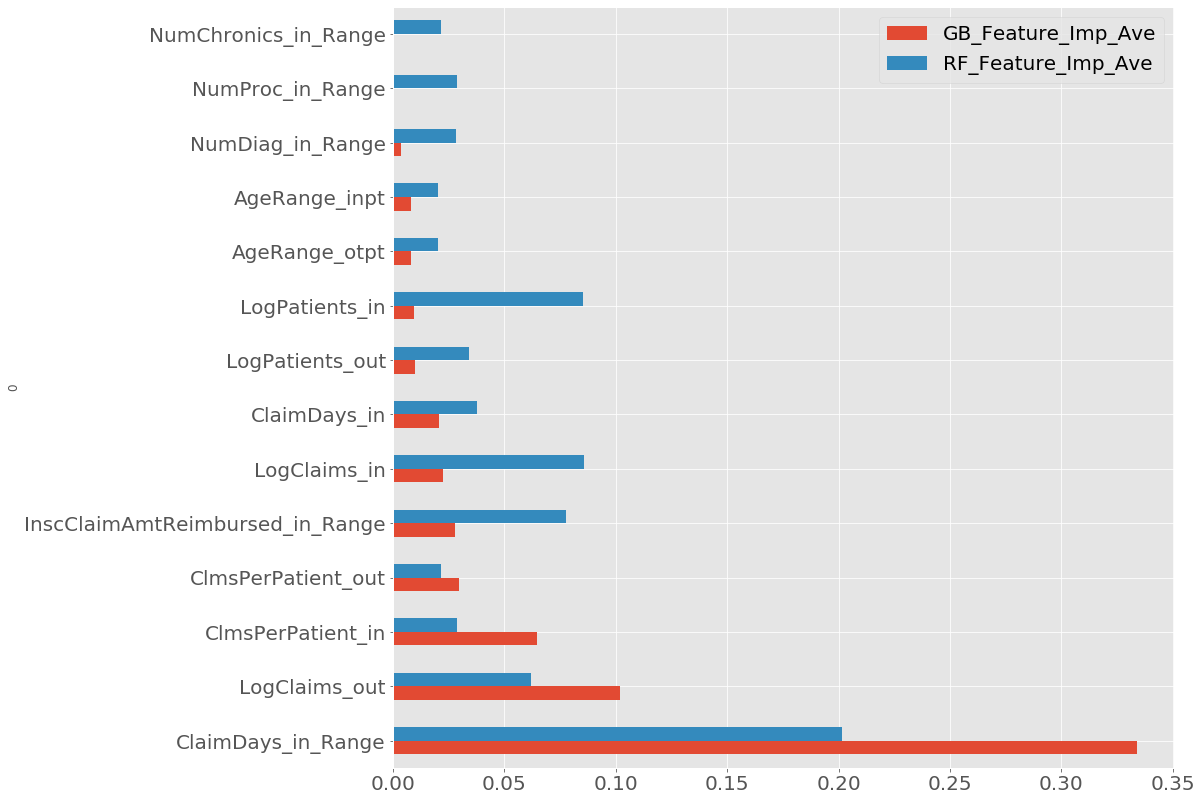

In [118]:
combine_feature_imp[(combine_feature_imp['GB_Feature_Imp_Ave']>0.02)|(combine_feature_imp['RF_Feature_Imp_Ave']>0.02)].plot.barh(x=0, y=['GB_Feature_Imp_Ave','RF_Feature_Imp_Ave'],figsize=(14,14),fontsize = 20).legend(fontsize = 20)